In [ ]:
!pip install tensorflow
!pip install tensorflow-datasets
!pip install tfds-nightly
!pip install matplotlib
!pip install pillow
!pip install tensorflow tensorflow_hub
!pip install --upgrade tensorflow tensorflow_hub
!pip install pydot graphviz


In [2]:
import numpy as np
import pandas as pd


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [4]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import numpy as np

In [5]:
# Importing necessary libraries and modules
!pip install accelerate
!
import warnings  # Import the 'warnings' module for handling warnings
warnings.filterwarnings("ignore")  # Ignore warnings during execution

import gc  # Import the 'gc' module for garbage collection
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import itertools  # Import 'itertools' for iterators and looping
from collections import Counter  # Import 'Counter' for counting elements
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
from sklearn.metrics import (  # Import various metrics from scikit-learn
    accuracy_score,  # For calculating accuracy
    roc_auc_score,  # For ROC AUC score
    confusion_matrix,  # For confusion matrix
    classification_report,  # For classification report
    f1_score  # For F1 score
)

# Import custom modules and classes
import accelerate # Import the 'accelerate' module
import evaluate  # Import the 'evaluate' module
from datasets import Dataset, Image, ClassLabel  # Import custom 'Dataset', 'ClassLabel', and 'Image' classes
from transformers import (  # Import various modules from the Transformers library
    TrainingArguments,  # For training arguments
    Trainer,  # For model training
    ViTImageProcessor,  # For processing image data with ViT models
    ViTForImageClassification,  # ViT model for image classification
    DefaultDataCollator  # For collating data in the default way
)
import torch  # Import PyTorch for deep learning
from torch.utils.data import DataLoader  # For creating data loaders
from torchvision.transforms import (  # Import image transformation functions
    CenterCrop,  # Center crop an image
    Compose,  # Compose multiple image transformations
    Normalize,  # Normalize image pixel values
    RandomRotation,  # Apply random rotation to images
    RandomResizedCrop,  # Crop and resize images randomly
    RandomHorizontalFlip,  # Apply random horizontal flip
    RandomAdjustSharpness,  # Adjust sharpness randomly
    Resize,  # Resize images
    ToTensor  # Convert images to PyTorch tensors
)

In [6]:
dataset_path= r"C:\Users\rakes\.vscode\archive\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset"
data_dir = r"C:\Users\rakes\.vscode\archive\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset"
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle = True
)
class_names = dataset.class_names
print(class_names)

Found 5945 files belonging to 40 classes.
['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


In [7]:
#Augmentation**
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
])

In [8]:
def load_and_preprocess_images(dataset_path, image_size=(128, 128)):
    images = []
    labels = []

    # Iterate through class directories
    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        class_label = int(class_dir)  # Convert directory name to label if needed

        # Iterate through images in the class directory
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Read and preprocess the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype(np.float32) / 255.0  # Normalize pixel values

            # Append the image and label to lists
            images.append(image)
            labels.append(class_label)

    return np.array(images), np.array(labels)

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Constants
IMAGE_RES = 224
BATCH_SIZE = 32
# Load the dataset
data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\rakes\.vscode\archive\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset",
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2,  # 20% of the data will be used for testing
    subset="training",     # Specify "training" to get the training subset
    seed=42,
    label_mode='int'
)
num_examples = data.cardinality().numpy()
num_classes = len(data.class_names)

# Split the data into training and testing
testing_data = tf.keras.utils.image_dataset_from_directory(
     r"C:\Users\rakes\.vscode\archive\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset",
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2,  # No validation split for testing
    seed=42,
    label_mode='int',
    subset="validation"    # Specify "validation" to get the testing subset
)

Found 5945 files belonging to 40 classes.
Using 4756 files for training.
Found 5945 files belonging to 40 classes.
Using 1189 files for validation.


In [10]:
for images, labels in data.take(1):  # Take one batch from the dataset
    print(labels)
    #print(images)

tf.Tensor(
[26 33 31 12  7 19 28  7 21 29  0 28 16 39 17 38 11 19  5  8  9 22 36  8
 31  2 36 38 36 23 30 23], shape=(32,), dtype=int32)


In [11]:
# Constants
IMAGE_RES = 224  # InceptionV3 input shape
BATCH_SIZE = 32

In [12]:
# Constants
IMAGE_RES = 224  # InceptionV3 input shape
BATCH_SIZE = 32
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES)) / 255.0
    return image, label
train_data = data
# Define the validation split ratio
num_examples = data.cardinality().numpy()
num_classes = len(data.class_names)
validation_split = 0.2
num_validation_samples = int(num_examples * validation_split)
validation_data = data.take(num_validation_samples)

train_batches = train_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_batches = validation_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Create the base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_RES, IMAGE_RES, 3),
    include_top=False,
    weights='imagenet'
)    

# Freeze the base model
base_model.trainable = False

# Add custom layers for classification
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

def create_alexnet_model(input_shape, num_classes):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())

    # 1st Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    # 2nd Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    # 3rd Fully Connected Layer
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model
input_shape=(IMAGE_RES, IMAGE_RES, 3)
model = create_alexnet_model(input_shape, num_classes)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(train_batches, validation_data=validation_batches, epochs=15)

# Evaluate the model on the testing dataset
testing_batches = testing_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_loss, test_accuracy = model.evaluate(testing_batches)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 56, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    51,384,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4096)           │        16,384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 76,092,144 (290.27 MB)

 Trainable params: 76,071,008 (290.19 MB)

 Non-trainable params: 21,136 (82.56 KB)

Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.0878 - loss: 3.9543 - val_accuracy: 0.0528 - val_loss: 7.2657
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.2328 - loss: 2.9358 - val_accuracy: 0.0808 - val_loss: 7.0057
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.3379 - loss: 2.3216 - val_accuracy: 0.3858 - val_loss: 2.8743
Epoch 4/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.4199 - loss: 1.9843 - val_accuracy: 0.2802 - val_loss: 4.2183
Epoch 5/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.4768 - loss: 1.7060 - val_accuracy: 0.1864 - val_loss: 7.9276
Epoch 6/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.5533 - loss: 1.4713 - val_accuracy: 0.1703 - val_loss: 7.6561
Epoch 7/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.5730 - loss: 1.3351 - val_accuracy: 0.2091 - val_loss: 4.9329
Epoch 8/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 1010s 7s/step - accuracy: 0.6262 - loss: 1.1860 - val_acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


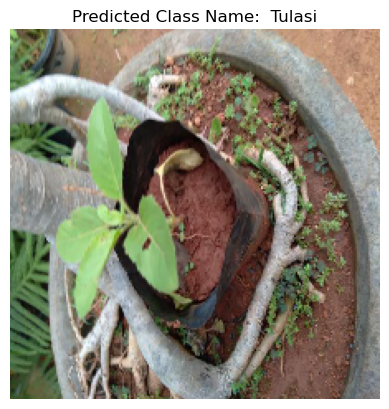

In [32]:
input_image_path = r"C:\Users\rakes\.vscode\archive\Indian Medicinal Leaves Image Datasets\Medicinal plant dataset\Tulasi\3535.jpg"
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name:  Tulasi")
plt.axis("off")
plt.show()

In [39]:
if predicted_class_name == 'Aloe vera':
    print('Aloe is used as a tonic for the female reproductive system, skin and hair. According to Ayurveda, Aloe is said to have clarifying, tonic, rejuvenating, purgative, and anti-inflammatory actions. It is also believed to provide a good solution to all the three Ayurveda constitutions, Vata, Pitta and KaphSeveral studies have shown the positive effects of Aloe vera to treat wounds such as psoriasis, mouth sores, ulcers, diabetes, herpes, bedsores, and burn wounds.')
if predicted_class_name == 'Bay leaf':
    print('Antioxidant Properties: Bay leaves contain antioxidants like flavonoids, which help neutralize harmful free radicals in the body, potentially reducing the risk of chronic diseasesAnti-inflammatory Effects: Compounds such as eugenol found in bay leaves have been shown to possess anti-inflammatory properties, which may help alleviate symptoms of inflammatory conditions like arthritis.Digestive Aid: Bay leaves have traditionally been used to aid digestion by stimulating the secretion of digestive enzymes, promoting smooth digestion and preventing digestive issues like bloating and indigestion.Respiratory Health: Inhalation of steam infused with bay leaf extract may help alleviate respiratory issues such as coughs and bronchitis, thanks to its antimicrobial and expectorant properties.Blood Sugar Regulation: Some studies suggest that compounds in bay leaves may help regulate blood sugar levels by improving insulin sensitivity, potentially benefiting individuals with diabetes. However, further research is needed to confirm these effects.Cardiovascular Support: Bay leaves may contribute to heart health by lowering cholesterol levels and reducing the risk of heart disease. Compounds like rutin and salicylates found in bay leaves may help improve circulation and prevent blood clots.') 
if predicted_class_name == 'Amla':
    print('Rich in vitamin C: Boosts immunity and fights off infections.High in antioxidants: Helps protect cells from damage caused by free radicals.Improves skin health: Promotes collagen production and may reduce signs of aging.Promotes hair growth: Nourishes the scalp and strengthens hair follicles.Aids digestion: Supports digestive health and relieves constipation.Anti-inflammatory properties: May help reduce inflammation in the body.Anti-cancer properties: Contains compounds that may inhibit the growth of cancer cells.Anti-aging effects: Helps protect against age-related diseases and promotes overall well-being..')
if predicted_class_name == 'Amrutha balli':
    print('Boosts immunity: Helps strengthen the immune system and fight off infections.Anti-inflammatory: Reduces inflammation and may help alleviate symptoms of arthritis and other inflammatory conditions.Antioxidant: Protects cells from damage caused by free radicals.Improves digestion: Aids in digestion and can help alleviate digestive issues like indigestion and constipation.Detoxifying: Helps cleanse the body of toxins and impurities.Antipyretic: Reduces fever and alleviates symptoms of illnesses like dengue and malaria.Anti-diabetic: May help regulate blood sugar levels in people with diabetes.Adaptogenic: Helps the body adapt to stress and promotes overall well-being.Liver protective: Supports liver health and may help prevent liver damage.Anti-arthritic: May help reduce symptoms of arthritis and other joint disorders.')
if predicted_class_name == 'Arali':    
    print('Antioxidant: Arali leaves contain compounds that help neutralize harmful free radicals in the body.Anti-inflammatory: They possess anti-inflammatory properties that may help reduce inflammation and alleviate symptoms of conditions like arthritis.Immune-boosting: Arali leaves are believed to enhance the immune system, helping the body fight off infections and illnesses.Analgesic: Some traditional medicine systems use arali leaves for their pain-relieving effects.Respiratory health: They may be beneficial for respiratory conditions such as coughs, colds, and asthma.Antimicrobial: Arali leaves have antimicrobial properties that can help combat various types of infections.Diuretic: They may promote urine production and help with conditions related to fluid retention.Cardiovascular health: Some studies suggest that arali leaves may have potential benefits for heart health, including blood pressure regulation and cholesterol management.Digestive aid: Arali leaves are sometimes used to promote digestive health and alleviate digestive discomfort.Adaptogenic: They may help the body adapt to stress and promote overall well-being.')
if predicted_class_name == 'Ashoka':  
    print('Anti-inflammatory: Ashoka leaves contain bioactive compounds that exhibit anti-inflammatory properties, which may help reduce inflammation and alleviate associated symptoms.Uterotonic: Ashoka leaves are traditionally used to support womens health, particularly for their ability to tone and strengthen the uterus. They are often used to manage menstrual disorders and support reproductive health./nAntioxidant: The leaves of the Ashoka tree contain antioxidants that help neutralize harmful free radicals in the body, thereby protecting cells from oxidative damage.Antimicrobial: Ashoka leaves have antimicrobial properties that can help inhibit the growth of certain bacteria, viruses, and fungi, contributing to their role in managing infections.Analgesic: Some traditional systems of medicine use Ashoka leaves for their pain-relieving properties, helping to alleviate discomfort.Astringent: Ashoka leaves have astringent properties, which may help tighten and tone tissues, making them useful in managing conditions like diarrhea and dysentery.Antidiarrheal: The astringent properties of Ashoka leaves may also help reduce diarrhea and improve digestive health.Anti-diabetic: Some studies suggest that Ashoka leaves may have potential benefits in managing diabetes by helping to regulate blood sugar levels.Cardiovascular health: Ashoka leaves are believed to have cardioprotective properties and may help support heart health by regulating blood pressure and cholesterol levels.Immunomodulatory: Ashoka leaves may have an immunomodulatory effect, helping to modulate the immune response and enhance overall immune function.')
if predicted_class_name == 'Ashwagandha':    
    print('Immunomodulatory: They may modulate the immune system, enhancing its function and improving resilience against infections.Anti-anxiety and stress-relieving: Ashwagandha leaves are traditionally used to reduce anxiety and stress, promoting relaxation and mental well-being.Neuroprotective: Some studies suggest that Ashwagandha leaves may have neuroprotective effects, supporting brain health and cognitive function.Anti-cancer properties: There is emerging research indicating that Ashwagandha leaves may possess anti-cancer properties, potentially inhibiting the growth of cancer cells.Anti-diabetic: Ashwagandha leaves may help regulate blood sugar levels, making them beneficial for individuals with diabetes.Antimicrobial: They have antimicrobial properties that can help combat various pathogens, including bacteria and fungi.Cardiovascular support: Ashwagandha leaves may support heart health by helping to regulate blood pressure and cholesterol levels.Anti-fatigue: Ashwagandha leaves are traditionally used to combat fatigue and increase energy levels.')
if predicted_class_name == 'Avacado':    
    print('Hypoglycemic: Some studies suggest that avocado leaves may have potential benefits in lowering blood sugar levels, making them potentially useful for managing diabetes.Antimicrobial: Avocado leaves have antimicrobial properties that can help inhibit the growth of certain bacteria, fungi, and parasites, contributing to their role in combating infections.Digestive aid: Avocado leaves are traditionally used to support digestive health, alleviate gastrointestinal discomfort, and promote regular bowel movements.Diuretic: They may have diuretic properties, promoting urine production and helping to eliminate excess fluid and toxins from the body.Analgesic: Avocado leaves are sometimes used for their pain-relieving properties, helping to alleviate discomfort.Cardioprotective: Some studies suggest that avocado leaves may have potential benefits for heart health by helping to regulate blood pressure and cholesterol levels.Respiratory health: Avocado leaves are believed to have respiratory benefits and may be used to alleviate symptoms of respiratory conditions such as asthma and coughs.Relaxant: They are also traditionally used as a natural remedy to promote relaxation and reduce stress.')
if predicted_class_name == 'Bamboo':    
    print('Detoxifying: Bamboo leaves are believed to have detoxifying effects, helping to eliminate toxins and impurities from the body.Digestive aid: Bamboo leaves are traditionally used to support digestive health, alleviate gastrointestinal discomfort, and promote regular bowel movements.Diuretic: They may have diuretic properties, promoting urine production and helping to eliminate excess fluid and toxins from the body.Cardioprotective: Some studies suggest that bamboo leaves may have potential benefits for heart health by helping to regulate blood pressure and cholesterol levels.Respiratory health: Bamboo leaves are believed to have respiratory benefits and may be used to alleviate symptoms of respiratory conditions such as coughs and colds.Relaxant: They are also traditionally used as a natural remedy to promote relaxation and reduce stress.Anti-diabetic: Some research indicates that bamboo leaves may help regulate blood sugar levels, making them potentially useful for managing diabetes.')
if predicted_class_name == 'Basale':     
    print('Detoxifying: Basale leaves are believed to have detoxifying effects, helping to eliminate toxins and impurities from the body.Anti-cancer properties: Preliminary research suggests that Basale leaves may contain compounds with anti-cancer properties, although more studies are needed to confirm their effectiveness.Skin health: Basale leaves may be used topically or consumed internally to promote skin health and alleviate skin-related issues.Cardiovascular support: Some studies suggest that Basale leaves may have potential benefits for heart health by helping to regulate blood pressure and cholesterol levels.Immune-boosting: Basale leaves are believed to enhance the immune system, helping the body fight off infections and illnesses.')
if predicted_class_name == 'Betel':     
    print('Relaxant: Betel leaves are traditionally used as a natural remedy to promote relaxation, reduce stress, and relieve anxiety.Oral health: Chewing betel leaves is a traditional practice in many cultures to promote oral hygiene, freshen breath, and prevent dental issues like cavities and gum disease.Respiratory health: Betel leaves are believed to have respiratory benefits and may be used to alleviate symptoms of respiratory conditions such as coughs, colds, and asthma.Analgesic: Betel leaves are sometimes used for their pain-relieving properties, helping to alleviate discomfort.Wound healing: Betel leaves are applied topically to wounds and cuts due to their antiseptic properties, which may help prevent infection and promote faster healing.')
if predicted_class_name == 'Brahmi':   
    print('Cognitive enhancement: Brahmi is well-known for its ability to improve cognitive function, including memory, concentration, and learning abilities. It is often used to support brain health and cognitive performance.Adaptogenic: Brahmi leaves possess adaptogenic properties, helping the body adapt to stressors and promote overall well-being.Antioxidant: They contain antioxidants that help neutralize free radicals and protect cells from oxidative damage, which contributes to their neuroprotective effects.Anxiolytic: Brahmi is traditionally used as a natural remedy to reduce anxiety and promote relaxation, making it beneficial for stress management and mental well-being.Neuroprotective: Brahmi leaves have neuroprotective effects, helping to protect neurons from damage and supporting overall brain health.Antidepressant: Some studies suggest that Brahmi leaves may have antidepressant properties, potentially helping to improve mood and alleviate symptoms of depression.Anticonvulsant: Brahmi has been studied for its potential anticonvulsant effects, which may help reduce the frequency and severity of seizures.')
if predicted_class_name == 'Castor':     
    print('Laxative: Castor leaves and their derivatives, particularly castor oil, are well-known for their laxative effects, helping to relieve constipation and promote bowel movements.Anti-inflammatory bowel disease: Some studies suggest that castor leaves may have potential benefits in managing inflammatory bowel diseases like ulcerative colitis, possibly due to their anti-inflammatory properties.Anti-cancer: Preliminary research indicates that certain compounds found in castor leaves may have anti-cancer properties, although more studies are needed to confirm their efficacy and safety.Immune modulation: Castor leaves may modulate the immune system, helping to enhance its function and improve resilience against infections.Analgesic: They are sometimes used for their pain-relieving effects, helping to alleviate discomfort associated with various ailments.')
if predicted_class_name == 'Curry leaf':     
    print('Digestive aid: Curry leaves are traditionally used to support digestive health, alleviate gastrointestinal discomfort, and promote appetite.Antimicrobial: Curry leaves have antimicrobial properties that can help inhibit the growth of certain bacteria and fungi, contributing to their role in combating infections.Diabetes management: Some studies suggest that curry leaves may have potential benefits in managing diabetes by helping to regulate blood sugar levels.Cholesterol regulation: Curry leaves may help regulate cholesterol levels, promoting heart health and reducing the risk of cardiovascular diseases.Hair health: Curry leaves are believed to have benefits for hair health, promoting hair growth, preventing premature graying, and reducing hair fall.Eye health: They are rich in vitamins A and C, which are important for eye health and may help prevent age-related macular degeneration and cataracts.Weight management: Curry leaves are low in calories and high in fiber, making them a good addition to a weight management diet by promoting satiety and regulating appetite.Liver health: Some research suggests that curry leaves may have hepatoprotective properties, supporting liver health and function.')
if predicted_class_name == 'Doddapatre':
    print('DoddapatreDiuretic: They may have diuretic properties, promoting urine production and helping to eliminate excess fluid and toxins from the body.Fever reducer: Doddapatre leaves are traditionally used to lower fever and alleviate symptoms of febrile illnesses.Stress reliever: Doddapatre leaves are believed to have calming properties, promoting relaxation and reducing stress and anxiety.Menstrual support: They are used in traditional medicine to alleviate symptoms of menstrual discomfort, such as cramps and bloating')
if predicted_class_name == 'Ekka':    
    print('Anti-inflammatory: Ekka leaves are believed to possess anti-inflammatory properties, which may help reduce inflammation in the body.Analgesic: They are traditionally used as a pain reliever, providing relief from various types of pain.Anti-diabetic: Some studies suggest that Ekka leaves may have potential in managing diabetes due to their anti-diabetic properties.Anti-microbial: Ekka leaves contain compounds that exhibit antimicrobial activity, making them useful in treating infections caused by bacteria, fungi, or other microorganisms.')
if predicted_class_name == 'Ganike':     
    print('Anti-inflammatory: Ganike leaves contain compounds that may help reduce inflammation in the body.Analgesic: They are traditionally used as a natural pain reliever for various ailments.Antioxidant: Ganike leaves possess antioxidant properties, which help protect cells from damage caused by free radicals.Anti-microbial: Some studies suggest that Ganike leaves have antimicrobial effects against certain bacteria and fungi.Respiratory health: They are used in treating respiratory conditions such as coughs, colds, and asthma due to their expectorant and bronchodilator properties.Antimicrobial: Guava leaves possess antimicrobial properties, making them effective against various bacteria, fungi, and even some parasitesBlood sugar control: Some research suggests that guava leaf extract may help lower blood sugar levels, potentially benefiting individuals with diabetes or those at risk of developing the condition.Digestive health.')       
if predicted_class_name == 'Guava':  
    print('Antimicrobial: Guava leaves possess antimicrobial properties, making them effective against various bacteria, fungi, and even some parasites.Blood sugar control: Some research suggests that guava leaf extract may help lower blood sugar levels, potentially benefiting individuals with diabetes or those at risk of developing the condition.Digestive health: Guava leaves have been traditionally used to promote digestive health, relieve gastrointestinal discomfort, and alleviate symptoms of diarrhea.Wound healing: The antimicrobial and anti-inflammatory properties of guava leaves may aid in wound healing and prevent infection.Guava:Natural mouth freshner')
if predicted_class_name == 'Geranium':      
    print('Astringent: Geranium leaves have astringent properties, which can help tighten and tone the skin. This makes them useful in skincare products for managing oily skin and acne.Anti-inflammatory: They contain compounds that possess anti-inflammatory properties, making geranium leaf beneficial for soothing inflammation and irritation, particularly in the skin.Antimicrobial: Geranium leaf essential oil has been found to exhibit antimicrobial activity against various bacteria and fungi, suggesting its potential in combating infections.Pain relief: Some research suggests that geranium leaf oil may have analgesic properties, providing relief from pain and discomfort when applied topically.Mood enhancement: The aroma of geranium leaf essential oil is known for its uplifting and calming effects, making it useful in aromatherapy for reducing stress, anxiety, and promoting relaxation.')
if predicted_class_name == 'Henna':        
    print('Anti-inflammatory: Compounds in henna leaves exhibit anti-inflammatory effects, aiding in soothing skin inflammation and conditions like eczema and psoriasis.Cooling effect: Henna leaves can provide a cooling sensation when applied topically, making them beneficial for relieving headaches, fever, and hot flashes.Hair health: Henna is widely used in hair care for its conditioning properties, promoting stronger and healthier hair growth while also combating dandruff and scalp irritation.Skin health: Besides its dyeing capabilities, henna can also act as a natural sunscreen, offering protection against harmful UV rays. Its also used in skincare for its exfoliating and cleansing properties')
if predicted_class_name == 'Hibiscus':    
    print('Scientific name: Hibicus rosa-sinesis\nMedicnal Extractions of Hibiscus leaf: \nAntioxidant-rich: Hibiscus leaves are packed with antioxidants, such as flavonoids and phenolic compounds, which help combat oxidative stress and reduce the risk of chronic diseases.\nHypotensive: Studies suggest that hibiscus leaf extract may help lower blood pressure, making it beneficial for individuals with hypertension or those looking to maintain cardiovascular health.\nLiver health: Hibiscus leaf extract has been shown to have hepatoprotective effects, supporting liver health and aiding in the detoxification process.\nDiuretic: Hibiscus leaves have diuretic properties, promoting urine production and helping to flush out toxins from the body.\nAntimicrobial: Hibiscus leaves contain antimicrobial compounds that can help inhibit the growth of bacteria, fungi, and other pathogens, supporting overall immune health.')
if predicted_class_name == 'Honge':      
    print('Antimicrobial: Extracts from honge leaves have shown antimicrobial activity against various bacteria, fungi, and viruses, making them useful in treating infections.Antioxidant: Honge leaves are rich in antioxidants, such as flavonoids and phenolic compounds, which help neutralize harmful free radicals and protect cells from damage.Wound healing: The leaves of the honge tree have been traditionally used in wound healing due to their antimicrobial and anti-inflammatory properties, which can promote faster healing and prevent infections.Pain relief: Honge leaf extracts may possess analgesic properties, providing relief from pain and discomfort associated with various conditions.')
if predicted_class_name == 'Insulin':    
    print('Anti-diabetic: Insulin plant leaves contain compounds that mimic the action of insulin, helping to lower blood sugar levels. This makes it a promising natural remedy for managing diabetes.Hypoglycemic: Consumption of insulin plant leaves or extracts has been shown to have hypoglycemic effects, meaning it can lower blood glucose levels in individuals with diabetes.Anti-inflammatory: Compounds in insulin plant leaves possess anti-inflammatory properties, which may help reduce inflammation in the body and alleviate symptoms of inflammatory conditions.Immunomodulatory: Some research suggests that insulin plant may have immunomodulatory effects, helping to regulate the immune systems response and improve overall immune function.')
if predicted_class_name == 'Jasmine':        
    print('Sedative: Jasmine leaves are known for their calming and sedative effects, making them beneficial for promoting relaxation, reducing stress, and improving sleep quality.Digestive health: Jasmine leaves have been used to support digestive health, alleviate gastrointestinal discomfort, and promote healthy digestion.Skin health: Jasmine leaves are often used in skincare products for their soothing and moisturizing properties, helping to nourish the skin and alleviate irritation.Respiratory health: Inhalation of jasmine leaf essential oil may help relieve respiratory symptoms such as coughs, congestion, and asthma due to its expectorant and bronchodilator properties.')
if predicted_class_name == 'Lemon':       
    print('Relaxation: The aroma of lemon leaves is known for its calming and mood-lifting effects, making it beneficial for reducing stress, anxiety, and promoting relaxation.Respiratory health: Inhalation of lemon leaf essential oil may help relieve respiratory symptoms such as coughs, congestion, and asthma due to its expectorant properties.Antioxidant: Lemon leaves contain antioxidants like flavonoids and vitamin C, which help combat oxidative stress and reduce the risk of chronic diseases.Anti-inflammatory: Compounds found in lemon leaves exhibit anti-inflammatory properties, which can help alleviate inflammation in the body and reduce the risk of inflammatory conditions.Digestive health: Lemon leaves have been traditionally used to support digestive health, alleviate gastrointestinal discomfort, and promote healthy digestion.')
if predicted_class_name == 'Mango':        
    print('Antioxidant: Mango leaves contain antioxidants like flavonoids, polyphenols, and vitamin C, which help neutralize free radicals and protect cells from oxidative damage.Anti-inflammatory: Compounds found in mango leaves exhibit anti-inflammatory properties, which can help reduce inflammation in the body and alleviate symptoms of inflammatory conditions.Blood sugar control: Research suggests that mango leaf extract may help lower blood sugar levels and improve insulin sensitivity, making it beneficial for individuals with diabetes or those at risk of developing the condition.Respiratory health: Mango leaf extract has been shown to have bronchodilator properties, making it useful in relieving respiratory symptoms such as coughs, asthma, and bronchitis.Skin health: Mango leaves contain compounds that promote wound healing and have antimicrobial properties, making them beneficial for skin conditions like cuts, burns, and infections')
if predicted_class_name == 'Mint':        
    print('Digestive aid: Mint leaves are known for their ability to soothe digestive issues such as indigestion, gas, bloating, and nausea. They can also stimulate bile flow, aiding in digestion.Antimicrobial: Mint leaves contain compounds that have antimicrobial properties, making them effective against various bacteria and fungi. They can help freshen breath and combat oral bacteria.Pain relief: Menthol, a compound found in mint leaves, has a cooling effect and can act as a natural pain reliever. Its often used to alleviate headaches, muscle aches, and joint pain.Respiratory support: Menthol in mint leaves can help relieve respiratory symptoms such as congestion, coughs, and sinusitis by acting as a decongestant and expectorant.Stress relief: The aroma of mint leaves has calming properties that can help reduce stress, anxiety, and promote relaxation.Skin health: Mint leaves have anti-inflammatory and antimicrobial properties, making them beneficial for treating skin conditions like acne, itching, and inflammation.')
if predicted_class_name == 'Nagadali':    
    print('Anti-inflammatory: It is believed to help reduce inflammation in the body, potentially offering relief from conditions like arthritis and inflammatory skin conditions.Analgesic: Nagadali is thought to have pain-relieving properties, making it useful for alleviating various types of pain, including joint pain and headaches.Digestive aid: Some traditional practices use nagadali to aid digestion and relieve digestive discomfort, such as indigestion and bloatingAntioxidant: It may possess antioxidant properties, which could help protect cells from oxidative damage caused by free radicals, potentially reducing the risk of chronic diseasesAntimicrobial: Nagadali might have antimicrobial properties, which could help fight against certain bacterial or fungal infections.Respiratory health: It is sometimes used to support respiratory health, including treating coughs and colds, although scientific evidence for this is limitedWound healing: In some traditional remedies, nagadali is applied topically to wounds to promote healing and prevent infection.')
if predicted_class_name == 'Neem':     
    print('Antifungal: Neem possesses antifungal properties, making it beneficial in treating fungal infections such as athletes foot and ringworm.Antiviral: Some traditional practices utilize neem for its potential antiviral properties, although scientific evidence in this regard is still limited.Anti-inflammatory: Neem has anti-inflammatory effects, which can help alleviate inflammation and redness associated with skin conditions like acne, eczema, and psoriasis.Antioxidant: It contains compounds with antioxidant properties, which may help protect cells from damage caused by free radicals and support overall health.Antiparasitic: Neem is used traditionally to treat parasitic infections, including intestinal worms and malaria.Immune system support: Its believed that neem can help boost the immune system, making the body more resilient to infections and diseases.Dental health: Neem twigs have been traditionally used as toothbrushes due to their antimicrobial properties, promoting oral hygiene and preventing cavities and gum disease.Blood purification: Neem is sometimes used to purify the blood and support liver health in traditional medicine systems.Skin care: Neem is a common ingredient in skincare products due to its ability to cleanse and purify the skin, reduce acne, and soothe irritation.')
if predicted_class_name == 'Nithyapushpa':      
    print('Anti-aging: Symbolizing eternal beauty, the concept of Nityapushpa could be associated with anti-aging properties or remedies that promote skin health and youthfulness.Stress relief: Just as an ever-blooming flower might evoke feelings of tranquility and peace, Nityapushpa could symbolize remedies or practices that help relieve stress and promote mental well-being.Longevity: In some cultural contexts, Nityapushpa may represent longevity or vitality, suggesting the use of medicinal herbs or practices that support overall health and longevity.Adaptogenic: Like a perennial flower that withstands various environmental conditions, Nityapushpa could symbolize adaptogenic properties, helping the body adapt to stress and maintain balance.Immune support: The concept of everlasting bloom might be associated with vitality and robust health, suggesting the use of herbs or treatments that support the immune system and prevent illness.')
if predicted_class_name == 'Noni':     
    print('mmune booster: Noni is believed to stimulate the immune system, enhancing the bodys natural defenses against infections and diseases.Analgesic: Traditionally, noni fruit and leaves have been used to alleviate pain, including headaches, arthritis pain, and muscle soreness.Antimicrobial: Noni exhibits antimicrobial activity against bacteria, fungi, and parasites, which may help in fighting infections and promoting overall health.Digestive aid: Noni has been used to improve digestive health, alleviate constipation, and promote regular bowel movements.Cardiovascular support: Some studies suggest that noni may help lower cholesterol levels, improve heart health, and reduce the risk of cardiovascular diseases.Skin health: Noni has been applied topically and ingested orally for various skin conditions, including wounds, burns, eczema, and acne, due to its anti-inflammatory and wound-healing properties.Anticancer: While further research is needed, some studies have indicated that noni may have potential anticancer properties, attributed to compounds like scopoletin and damnacanthal.')
if predicted_class_name == 'Papaya':     
    print('Digestive Aid: Papaya contains enzymes like papain, which aid digestion by breaking down proteins. Consuming papaya can help relieve digestive issues such as constipation, bloating, and indigestion.Anti-inflammatory: Papaya contains compounds like flavonoids and vitamin C, which have anti-inflammatory properties. Consuming papaya may help reduce inflammation in the body and alleviate symptoms of inflammatory conditions like arthritis.Immune Booster: Rich in vitamin C, papaya helps boost the immune system, making the body more resistant to infections and illnesses.Antioxidant: Papaya is a good source of antioxidants like carotenoids and flavonoids, which help neutralize free radicals in the body, reducing oxidative stress and lowering the risk of chronic diseases.Wound Healing: Papaya contains enzymes and vitamins that promote wound healing. Applying papaya pulp or papaya-based ointments topically can help speed up the healing process of cuts, burns, and wounds.Skin Health: Papaya is often used in skincare products due to its exfoliating and moisturizing properties. It can help remove dead skin cells, unclog pores, and promote a radiant complexion.Heart Health: The antioxidants and fiber in papaya may help lower cholesterol levels and improve heart health. Regular consumption of papaya is associated with a reduced risk of heart disease and stroke.Eye Health: Papaya is rich in vitamin A and carotenoids like lutein and zeaxanthin, which are essential for maintaining good vision and preventing age-related macular degeneration.Anti-parasitic: Papaya seeds contain compounds like carpaine, which have been traditionally used to treat parasitic infections like intestinal worms.Menstrual Regulation: Papaya is believed to have emmenagogue properties, which means it can stimulate menstrual flow and regulate irregular periods.')
if predicted_class_name == 'Pepper':         
    print('Digestive Aid: Pepper stimulates the secretion of digestive enzymes, promoting healthy digestion and alleviating symptoms like bloating and gas.Anti-inflammatory: Piperine, a compound found in black pepper, exhibits anti-inflammatory properties, which can help reduce inflammation and alleviate symptoms of inflammatory conditions like arthritiAntioxidant: Black pepper contains antioxidants that help neutralize free radicals, protecting cells from damage and reducing the risk of chronic diseases.Respiratory Health: The pungent flavor of pepper can help stimulate mucus flow and alleviate congestion, making it beneficial for respiratory health.Weight Loss: Piperine may help boost metabolism and aid in weight loss by increasing the bodys calorie-burning process and reducing fat accumulation.Improves Bioavailability: Piperine enhances the bioavailability of certain nutrients, such as curcumin from turmeric, by inhibiting enzymes that break them down in the gut. This property increases the absorption of nutrients and enhances their therapeutic effects.Anti-bacterial: Some studies suggest that black pepper extracts exhibit antibacterial properties, which can help fight against certain bacterial infections.Pain Relief: Peppers analgesic properties may help alleviate pain, including headaches and muscle soreness.Enhances Cognitive Function: Piperine may have neuroprotective effects and enhance cognitive function, potentially reducing the risk of neurodegenerative diseases like Alzheimers.Improves Blood Sugar Control: Preliminary research suggests that black pepper may help improve insulin sensitivity and regulate blood sugar levels, which is beneficial for individuals with diabetes.')
if predicted_class_name == 'Pomegranate':    
    print('Antioxidant: Pomegranate is rich in antioxidants, particularly polyphenols such as flavonoids and tannins. These compounds help neutralize free radicals, reducing oxidative stress and lowering the risk of chronic diseases such as heart disease and cancer.Heart Health: Pomegranate juice has been shown to have beneficial effects on heart health. It may lower blood pressure, reduce LDL cholesterol levels, and improve overall cardiovascular function.Anti-inflammatory: Compounds found in pomegranate, such as punicalagins and anthocyanins, have anti-inflammatory properties. Regular consumption of pomegranate may help reduce inflammation in the body and alleviate symptoms of inflammatory conditions like arthritis.Anti-bacterial and Anti-viral: Pomegranate extract has demonstrated antibacterial and antiviral properties in some studies. It may help inhibit the growth of certain bacteria and viruses, reducing the risk of infections.Digestive Health: Pomegranate has been traditionally used to treat digestive disorders such as diarrhea, dysentery, and intestinal parasites. Its astringent properties may help tighten and tone the digestive tract.Immune Booster: Pomegranate is rich in vitamin C, which supports immune function and helps the body fight off infections. Regular consumption of pomegranate may help strengthen the immune system.Anti-cancer: Some research suggests that pomegranate extract may have anti-cancer properties. It may help inhibit the growth of cancer cells, reduce inflammation, and induce apoptosis (cell death) in cancer cells.Skin Health: Pomegranate extract is commonly used in skincare products due to its antioxidant and anti-inflammatory properties. It may help protect the skin from damage caused by UV radiation, reduce signs of aging, and promote overall skin health.Memory and Cognitive Function: Preliminary studies suggest that pomegranate may have neuroprotective effects and improve memory and cognitive function. It may help reduce the risk of neurodegenerative diseases like Alzheimers.Menstrual Health: Pomegranate has been used traditionally to regulate menstrual cycles and alleviate symptoms of menopause. Its phytoestrogenic properties may help balance hormone levels in the body.')
if predicted_class_name == 'Rakthachandanam':       
    print('Anti-inflammatory: Red Sandalwood contains compounds that exhibit anti-inflammatory properties, making it useful in reducing inflammation and swelling associated with conditions like arthritis and skin irritations.Antioxidant: It is rich in antioxidants, such as flavonoids and phenolic compounds, which help neutralize free radicals in the body, reducing oxidative stress and lowering the risk of chronic diseases.Skin Health: Red Sandalwood is commonly used in skincare products due to its ability to soothe and heal the skin. It helps in treating acne, scars, and blemishes, and also acts as a natural astringent, tightening the skin and reducing pores.Anti-microbial: It exhibits antimicrobial properties, which make it effective against certain bacteria and fungi. It can be used topically to prevent and treat skin infections.Anti-aging: Red Sandalwood helps in rejuvenating the skin and reducing signs of aging such as wrinkles and fine lines. It promotes cell regeneration and improves skin elasticity.Wound Healing: It aids in wound healing by promoting the formation of new tissue and preventing infection. Red Sandalwood paste can be applied topically to cuts, burns, and wounds for faster healing.Digestive Health: In traditional medicine, Red Sandalwood is sometimes used to treat digestive issues such as diarrhea and dysentery. It has astringent properties that help in tightening the intestines and reducing bowel movements.Diuretic: Red Sandalwood has diuretic properties, which means it can increase urine production and help in flushing out toxins from the body. This property may also be beneficial for individuals with urinary tract infections.Respiratory Health: It is believed to have respiratory benefits and is sometimes used to alleviate symptoms of coughs and colds. Red Sandalwood paste can be applied to the chest to relieve congestion.Emmenagogue: In some traditional practices, Red Sandalwood is used to regulate menstrual cycles and alleviate menstrual cramps. It helps in balancing hormone levels and improving blood circulation.')
if predicted_class_name == 'Rose':         
    print('Antibacterial and Antiviral: Some studies suggest that rose extracts possess antibacterial and antiviral properties, which may help combat infections and promote immune health.Astringent: Rose petanls have astringent properties, meaning they can help tighten and tone the skin. Rose water or rose-based toners are often used to reduce the appearance of pores and control excess oil production.Analgesic: Rose oil or rose-infused creams may have mild analgesic properties, providing relief from headaches, menstrual cramps, and other types of pain.Anti-anxiety and Relaxation: The scent of roses is known for its calming and mood-enhancing effects. Aromatherapy with rose essential oil or rose petals may help reduce anxiety, stress, and promote relaxation.Digestive Health: Rose water has been traditionally used to improve digestion and relieve gastrointestinal discomfort. It may help soothe stomach cramps, bloating, and indigestion.Respiratory Health: In traditional medicine, rose tea or rose-infused steam inhalations have been used to alleviate symptoms of respiratory conditions like coughs, colds, and bronchitis.Cardiovascular Health: Some studies suggest that rose extracts may help improve heart health by reducing cholesterol levels, improving blood circulation, and supporting healthy blood pressure levels.Menstrual Health: Rose tea or rose-based remedies are sometimes used to regulate menstrual cycles, alleviate menstrual cramps, and relieve symptoms of menopause')
if predicted_class_name == 'Tulasi':      
    print('Medicnal Extractions of Hibiscus leaf: \nAdaptogenic: Tulsi is considered an adaptogen, meaning it helps the body adapt to stress and maintain balance.\n It supports the adrenal glands and helps the body cope with stressors, both physical and emotional.\nAntioxidant: Tulsi is rich in antioxidants, such as flavonoids and phenolic compounds, which help neutralize free radicals, reduce oxidative stress, and protect cells from damage.\n Regular consumption of tulsi tea or extract may help prevent chronic diseases and slow down the aging process.\nAnti-inflammatory: Tulsi contains compounds with anti-inflammatory properties, which can help reduce inflammation and alleviate symptoms of inflammatory conditions like arthritis, asthma, and skin disorders.\nAntimicrobial: Tulsi has strong antimicrobial properties, making it effective against bacteria, viruses, and fungi. \nIt can help prevent and treat infections, including respiratory infections, urinary tract infections, and skin infections.\nImmune Booster: Tulsi is known for its immunomodulatory effects, meaning it helps regulate and strengthen the immune system. \nRegular consumption of tulsi tea or extract may help prevent infections and support overall immune health.\nRespiratory Health: Tulsi has been traditionally used to treat respiratory conditions like coughs, colds, and bronchitis. \nIts expectorant properties help loosen mucus and clear congestion, making it easier to breathe\n.Digestive Health: Tulsi supports digestive health by promoting the secretion of digestive enzymes and relieving gastrointestinal discomfort. It can help improve digestion, reduce bloating, and relieve symptoms of indigestion and gasCardiovascular \nHealth: Tulsi may help improve heart health by lowering cholesterol levels, regulating blood pressure, and reducing the risk of cardiovascular diseases. It supports healthy circulation and prevents the formation of blood clots.\nAnti-diabetic: Some studies suggest that tulsi may help lower blood sugar levels and improve insulin sensitivity, making it beneficial for individuals with diabetes.Mood and Cognitive Function: Tulsi has adaptogenic properties that help reduce stress and anxiety, improve mood, and enhance cognitive function. It may help improve memory, ')
if predicted_class_name == 'Sapota':      
    print('Digestive Health: Sapota is rich in dietary fiber, which helps promote healthy digestion, prevent constipation, and regulate bowel movements. Eating sapota regularly can support gastrointestinal health.Energy Booster: Sapota is a good source of natural sugars, including fructose and sucrose, providing a quick and sustained energy boost. Its often consumed as a snack or added to smoothies for an energy boost.Immune Support: Sapota is rich in vitamin C, which helps boost the immune system and protect the body against infections and diseases. Regular consumption of sapota can help strengthen immunity.Anti-inflammatory: Some compounds found in sapota exhibit anti-inflammatory properties, which can help reduce inflammation and alleviate symptoms of inflammatory conditions like arthritis and asthma.Antioxidant: Sapota contains antioxidants like vitamin C and carotenoids, which help neutralize free radicals, reduce oxidative stress, and protect cells from damage. Antioxidants play a crucial role in preventing chronic diseases and slowing down the aging process.Heart Health: The fiber, potassium, and antioxidants in sapota contribute to heart health by lowering cholesterol levels, regulating blood pressure, and reducing the risk of cardiovascular diseases like heart attack and stroke.Skin Health: The vitamin E content in sapota helps nourish the skin, promote cell regeneration, and prevent premature aging. Applying sapota pulp or oil topically can help moisturize the skin and improve its texture and appearance.Bone Health: Sapota is a good source of calcium, phosphorus, and magnesium, which are essential minerals for bone health. Regular consumption of sapota can help strengthen bones and prevent conditions like osteoporosis.Weight Management: Despite its natural sugars, sapota is relatively low in calories and fat, making it a suitable option for weight management when consumed in moderation as part of a balanced diet.Anti-cancer Properties: Some studies suggest that compounds found in sapota, such as ')
if predicted_class_name == 'Woodsorel':          
    print('Digestive Aid: Wood sorrel has been used traditionally to improve digestion and relieve gastrointestinal discomfort. It contains oxalic acid, which may stimulate the secretion of digestive enzymes and promote healthy digestion.Diuretic: Wood sorrel has diuretic properties, meaning it can increase urine production and help flush out toxins from the body. This property may be beneficial for individuals with urinary tract infections or edema.Antimicrobial: Some studies suggest that wood sorrel extracts exhibit antimicrobial activity against certain bacteria and fungi. It may help prevent and treat infections when applied topically or consumed internally.Oral Health: Wood sorrel has astringent properties, which can help tighten and tone tissues. It has been used traditionally as a mouthwash or gargle to soothe sore throats and promote oral health.Skin Care: Wood sorrel is sometimes used topically to soothe skin irritations, including rashes, insect bites, and minor burns. Its anti-inflammatory and astringent properties may help reduce redness and swelling.Fever Reduction: In some traditional medicine systems, wood sorrel has been used to lower fever and alleviate symptoms of colds and flu. Its cooling properties may help bring down body temperature and promote comfort.Nutritional Benefits: Wood sorrel is edible and rich in vitamins and minerals, including vitamin C, vitamin A, calcium, and potassium. Consuming wood sorrel as part of a balanced diet can provide essential nutrients for overall health.Traditional Uses: Wood sorrel has a long history of use in traditional medicine systems around the world. It has been used to treat various ailments, including digestive disorders, urinary tract infections, and skin conditions.')    

In [41]:
def plot_accuracy_loss(history):
    """
        We plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()